# Plant Growth Data Classification

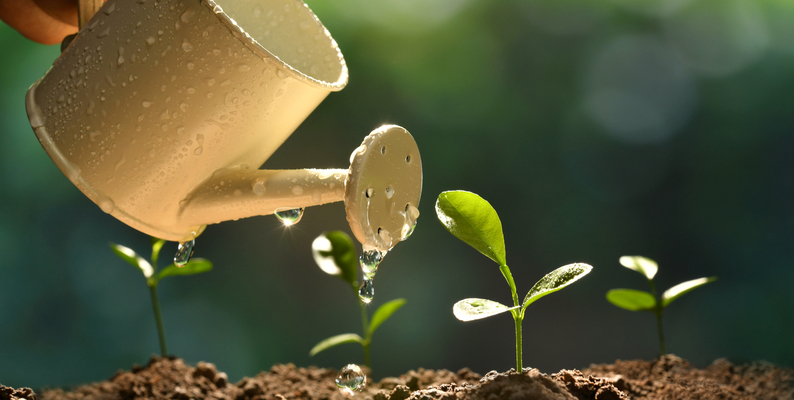

**Plant Growth Data Classification**

**Problem Statement**

Agricultural productivity relies on understanding and managing soil conditions to match the nutrient requirements of specific crops. With varying needs for nitrogen (N), phosphorus (P), and potassium (K), as well as sensitivity to soil temperature and pH levels, it is critical for farmers to determine which crops are most suitable for their soil conditions to optimize yield.

This dataset includes key soil properties—nutrient levels (N, P, K), average soil temperature (°F), and pH (acidity or basicity)—and maps them to specific crop types (e.g., rice, maize, various legumes, fruits, and cash crops like cotton and coffee). Using this data, we aim to develop a predictive model that suggests the most suitable crop types based on given soil characteristics.

**Objective**

To build a machine learning model that recommends the best crop(s) based on soil nutrient levels (N, P, K), temperature, and pH, thereby supporting informed decision-making for farmers and improving agricultural efficiency.

**Goals**

1. **Analyze Soil-Condition Requirements for Different Crops**: Explore the soil nutrient composition, temperature, and pH ranges ideal for each crop in the dataset.

2. **Develop Predictive Model**: Train a classification model that suggests optimal crop choices based on the input conditions of N, P, K levels, temperature, and pH.

3. **Evaluate Model Accuracy**: Assess the model's accuracy in correctly recommending crop types by validating it against test data.
Provide Insights for Crop Rotation or Soil Amendment: Use the model to suggest soil amendments or crop rotation strategies to achieve better suitability for desired crops.


# Importing Libraries and Loading dataset

In [1]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\HealthCare\\Agreeculture Domain'

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn import model_selection
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("Plan_Growth_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
print("Shape of the dataframe :", df.shape)
df.isna().sum()

Shape of the dataframe : (2200, 8)


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

# EDA - Exploratory Data Analysis

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

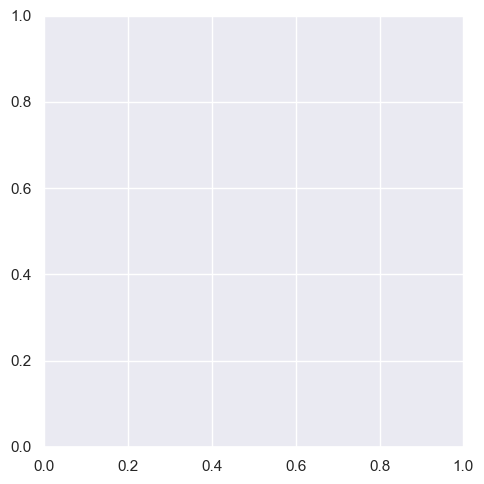

In [20]:
sns.displot(x=df['N'],data=df, bins=20, kde=True, edgecolor="black", color='black', facecolor="#ffb03b")
plt.title("Nitrogen", size=20)
plt.show()

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

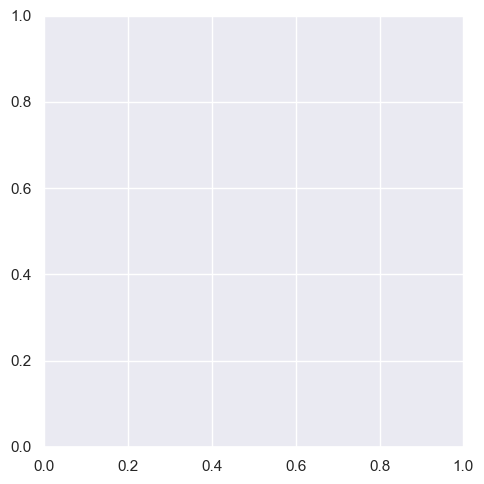

In [19]:
sns.displot(x=df['P'],data=df, bins=20, kde=True, edgecolor="black", color='black', facecolor="#ffb03b")
plt.title("Phosphorus", size=20)
plt.show()